In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import itertools
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [17]:
import imblearn
import joblib
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

In [18]:
df_encoded = pd.read_csv("../data/processed/telco_churn_clean.csv")
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [54]:
df1 = pd.read_csv("../data/processed/df1.csv")
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [19]:
cols = list(df_encoded.columns) 
cols.remove('Churn')

x = df_encoded.loc[:, cols] 
y = df_encoded.loc[:, 'Churn']


In [20]:
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)


In [21]:
over = SMOTE(sampling_strategy=1)
x1, y1 = over.fit_resample(x, y)


In [22]:
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y1))


Class distribution before SMOTE: Counter({0: 5174, 1: 1869})
Class distribution after SMOTE: Counter({0: 5174, 1: 5174})


<small>

#### Rééquilibrage des classes avec SMOTE  



L’analyse initiale de la variable cible **Churn** a révélé un **déséquilibre important** :  
- **5174 clients Non-Churn** (≈ 73 %)  
- **1869 clients Churn** (≈ 27 %)  

Un tel déséquilibre peut biaiser les modèles de machine learning, qui auront tendance à privilégier la classe majoritaire.  

Pour pallier ce problème, nous avons appliqué la méthode **SMOTE** (*Synthetic Minority Over-sampling Technique*), qui génère artificiellement de nouvelles observations de la classe minoritaire à partir de ses voisins les plus proches.  

- **Avant SMOTE** : {0: 5174, 1: 1869}  
- **Après SMOTE** : {0: 5174, 1: 5174}  

Ainsi, le dataset devient **parfaitement équilibré**.  
Cette étape est cruciale pour améliorer la capacité des modèles à **détecter correctement les churners**, ce qui constitue l’objectif principal de l’analyse.  

</small>


<small>

#### Gestion du Data Leakage

Le **data leakage** constitue un défi majeur lorsqu’une information externe, située en dehors du jeu de données d’entraînement, influence la création du modèle. C’est un problème souvent sous-estimé, mais aux conséquences critiques.

- Le risque principal est d’obtenir des modèles **trop optimistes** en phase d’entraînement, mais **inutilisables en production**, car ils reposent sur des informations auxquelles le modèle n’aura pas accès dans un contexte réel.  
- Pour développer des modèles robustes, il est donc essentiel de **prévenir toute fuite de données**.

#### Bonnes pratiques pour éviter le Data Leakage
- Réaliser un **train-test split avant toute transformation** (imputation, normalisation, encodage, sur-échantillonnage, etc.).  
- S’assurer que toutes les transformations (par ex. calcul des moyennes pour l’imputation, scaling, encodage des variables catégorielles) soient **apprises uniquement sur l’échantillon d’entraînement** et appliquées ensuite à l’échantillon de test.  
- Éviter l’introduction d’informations futures ou externes dans le processus de modélisation.

Cette approche garantit que les performances mesurées sur le test set reflètent bien les performances attendues en **production**, et non une surévaluation due à une fuite de données.


In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.20, random_state=2, stratify=y1
)

print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)


Train set: (8278, 19) (8278,)
Test set: (2070, 19) (2070,)


<small>

#### Séparation du dataset en train et test



Après l’étape de rééquilibrage via **SMOTE**, le dataset contient 10 348 observations équilibrées entre **Churn** et **Non-Churn**.  
Nous avons séparé les données en deux ensembles :  

- **Train set** : 8 278 observations (80 %)  
- **Test set** : 2 070 observations (20 %)  

Cette séparation permet d’entraîner les modèles sur l’échantillon d’apprentissage (*train*) tout en évaluant leur performance sur un échantillon **indépendant** (*test*).  
Ainsi, nous limitons le risque de **sur-apprentissage (overfitting)** et garantissons une meilleure capacité de généralisation.  

</small>


<small>

#### Visualisation de la matrice de corrélation

Pour générer une matrice de corrélation, un nouveau DataFrame est construit en utilisant uniquement les valeurs issues de **x_train** et **y_train**.  

Cette approche volontairement restreinte permet de :  
- **Préserver l’intégrité des données**,  
- **Éviter tout risque de data leakage**,  
- Garantir que les corrélations observées reflètent uniquement les relations présentes dans l’échantillon d’entraînement.  

Ainsi, la matrice de corrélation met en évidence les liens entre les variables explicatives et la variable cible (`Churn`), tout en respectant les bonnes pratiques de modélisation.


In [26]:
# Creating a DataFrame from x_train
x_train_df = pd.DataFrame(x_train, columns=cols)

# Creating a DataFrame for y_train
y_train_df = pd.DataFrame({'Churn': y_train})

# Concatenate x_train_df and y_train_df along columns
x_train_test = pd.concat([x_train_df, y_train_df], axis=1)

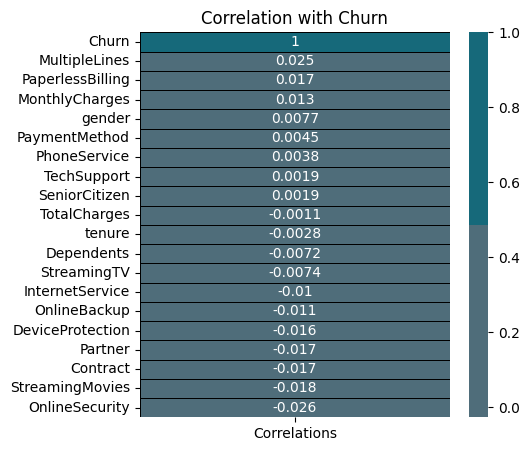

In [29]:
# Calculate correlation matrix

colors = ['#4F6D7A', '#16697A'] 
corr = x_train_test.corr()['Churn'].sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation with Churn')
plt.show()

<small>

#### Analyse Corrélations avec la variable cible (Churn)

L’analyse des corrélations met en évidence que :

- Les corrélations sont globalement **faibles** (< 0.03 en valeur absolue), ce qui est typique dans un problème de churn.  
- Certaines variables présentent une **corrélation positive** avec le churn, comme `StreamingMovies`, `MultipleLines`, `DeviceProtection`, ou `OnlineBackup`.  
  Leur présence est associée à une probabilité légèrement plus élevée de churn.  
- D’autres variables montrent une **corrélation négative** (`PhoneService`, `InternetService`, `StreamingTV`), suggérant qu’elles jouent un rôle protecteur vis-à-vis du churn.  
- Les variables continues (`MonthlyCharges`, `TotalCharges`) ont des corrélations faibles avec `Churn`, ce qui indique que leur effet est probablement **non linéaire** et devra être capturé par des modèles plus flexibles (ex. Random Forest, XGBoost).  

Ces corrélations, bien que faibles, fournissent des indices utiles pour la sélection de variables et la compréhension du phénomène de churn.


### Stratégie de sélection des variables catégorielles


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
# Rechercher les colonnes binaires (0/1 ou 0.0/1.0)
categorical_features = [col for col in x_train_df.columns 
                        if set(x_train_df[col].round().unique()) <= {0,1}]

features = x_train_df[categorical_features]

print("Nombre de variables catégorielles détectées :", len(categorical_features))
print(categorical_features[:10])  # aperçu


Nombre de variables catégorielles détectées : 6
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


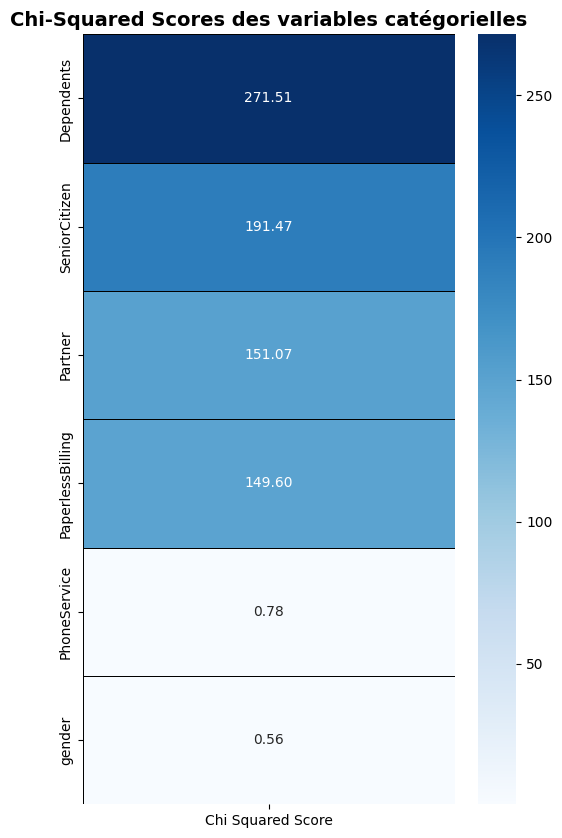

In [35]:

from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, y_train)

featureScores = pd.DataFrame(
    data=fit.scores_,
    index=features.columns,
    columns=['Chi Squared Score']
)

plt.figure(figsize=(6, 10))
sns.heatmap(featureScores.sort_values(by='Chi Squared Score', ascending=False),
            annot=True, cmap="Blues", linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Chi-Squared Scores des variables catégorielles', fontsize=14, weight='bold')
plt.show()


<small>

#### Analyse de la Sélection des Variables Catégorielles (Chi²)

Le test du Chi² a été appliqué sur les variables catégorielles pour évaluer leur association avec la variable cible **Churn**.  
Les résultats indiquent que certaines variables possèdent une **forte capacité explicative** :

- **Contract**, **OnlineSecurity** et **TechSupport** se distinguent avec des scores particulièrement élevés, soulignant leur rôle clé dans la prédiction du churn.  
- D'autres variables comme **OnlineBackup**, **DeviceProtection**, **Dependents** et **SeniorCitizen** présentent également une corrélation notable avec la variable cible.  
- En revanche, des variables telles que **gender**, **PhoneService**, **MultipleLines** et **InternetService** montrent une très faible association, ce qui suggère un impact limité sur la prédiction du churn.

Cette analyse permet de réduire le bruit dans les données en se concentrant sur les variables catégorielles réellement pertinentes, améliorant ainsi la performance et l’interprétabilité du modèle.


<small>

### Analyse de la Sélection des Variables Numériques (ANOVA F-test)

In [36]:
from sklearn.feature_selection import f_classif

In [37]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']


               ANOVA_Score
gender                0.56
SeniorCitizen       191.47
Partner             151.07
Dependents          271.51
PhoneService          0.78


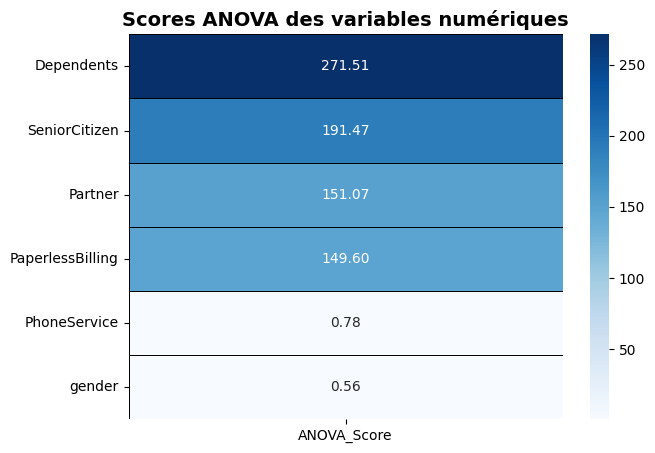

In [ ]:
# 
featureScores = pd.DataFrame(
    data=fit.scores_,
    index=features.columns,
    columns=['ANOVA_Score']   
)

# Vérif
print(featureScores.head())

# Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(
    featureScores.sort_values(by='ANOVA_Score', ascending=False),
    annot=True, cmap="Blues", linewidths=0.4, linecolor='black', fmt='.2f'
)
plt.title('Scores ANOVA des variables numériques', fontsize=14, weight="bold")
plt.show()


<small>

#### Analyse des Variables Numériques (ANOVA F-test)

L’application du test **ANOVA F-test** sur les variables numériques met en évidence leur pouvoir discriminant vis-à-vis de la variable cible **Churn** :  

- **tenure** ressort comme le facteur le plus influent, avec un score largement supérieur, confirmant que **l’ancienneté** du client est un indicateur clé de fidélisation.  
- **TotalCharges** présente également une forte corrélation, reflétant son lien direct avec la durée d’abonnement et le comportement de résiliation.  
- **MonthlyCharges** conserve un poids explicatif significatif, soulignant que le **niveau de facturation mensuelle** influence directement la probabilité de churn.  

Ces résultats soulignent que les variables financières et temporelles jouent un rôle **majeur** dans la compréhension et la prédiction du churn.  

</small>


In [40]:
# Liste des colonnes à supprimer (faible pertinence)
to_drop = [
    'PhoneService',
    'gender',
    'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No'
]

# Application sur train et test
x_train = x_train_df.drop(columns=[col for col in to_drop if col in x_train_df.columns])
x_test_df = pd.DataFrame(x_test, columns=cols)
x_test = x_test_df.drop(columns=[col for col in to_drop if col in x_test_df.columns])

print("Colonnes supprimées :", set(to_drop) & set(cols))
print("x_train:", x_train.shape, "x_test:", x_test.shape)


Colonnes supprimées : {'gender', 'PhoneService'}
x_train: (8278, 17) x_test: (2070, 17)


#### Mise à l’échelle des données pour les modèles de Machine Learning


In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()  # Min-Max Scaling
ss = StandardScaler()  # Standardization

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

x_train[columns_to_scale] = mms.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = mms.transform(x_test[columns_to_scale])

<small>


En apprentissage automatique, il est essentiel d’assurer une **uniformité dans l’interprétation des valeurs des variables**.  
Deux méthodes principales existent pour la mise à l’échelle des données : **la Normalisation** et **la Standardisation**.  
Le choix entre elles dépend de la **distribution des données**.

- **Normalisation (Min-Max Scaling)**  
  - Appliquée aux variables qui ne suivent **pas une distribution normale (Gaussienne)**.  
  - Dans notre jeu de données, `tenure`, `MonthlyCharges` et `TotalCharges` présentent des distributions **asymétriques (right-skewed)** et parfois **bimodales**.  
  - La normalisation ramène ces variables dans une échelle **[0,1]**, ce qui facilite leur comparaison.  

- **Standardisation (Z-score scaling)**  
  - Utilisée pour les variables qui suivent une **distribution normale (Gaussienne)**.  
  - Non appliquée ici, car aucune des variables ne suit une distribution parfaitement normale.  
  - Pertinente lorsque les variables sont sur des **échelles très différentes**, afin qu’elles contribuent de manière équitable à l’apprentissage du modèle.  

**En résumé** :  
La **normalisation** a été retenue pour `tenure`, `MonthlyCharges` et `TotalCharges`, car leurs distributions ne sont pas Gaussiennes.  
La **standardisation** pourra être envisagée si de futures transformations ou de nouvelles variables suivent une loi normale.  


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

<small>

#### Utilisation des variables sélectionnées

En utilisant les **caractéristiques sélectionnées à travers les tests**,  nous divisons les données en deux ensembles : **80 % pour l’entraînement** et **20 % pour le test**.  Le modèle est **entraîné sur l’ensemble d’apprentissage**, puis **évalué sur l’ensemble de test**.  
Cette approche garantit la construction d’un **modèle de machine learning robuste et efficace**.


In [43]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    
    accuracy =classifier.score(x_test,y_test)
    print("Accuracy is :",accuracy)
    
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

    

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    plt.figure(figsize=(4,3))
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

<small>

#### XGBoost Classifier

##### Optimisation des prédictions : exploiter la puissance de XGBoost


L’algorithme **XGBoost (Extreme Gradient Boosting)** est un classificateur basé sur les arbres de décision, réputé pour sa **vitesse** et sa **performance**.  

- Il repose sur la méthode du **boosting**, qui consiste à combiner plusieurs arbres faibles afin de créer un modèle puissant.  
- Ses avantages principaux sont :  
  - Gestion efficace des données déséquilibrées.  
  - Réduction du surapprentissage grâce à la régularisation.  
  - Rapidité et parallélisation, le rendant adapté aux grands ensembles de données.  

Dans le cadre de notre analyse du **churn client**, XGBoost est utilisé pour optimiser les prédictions et améliorer la robustesse par rapport aux modèles de base comme la régression logistique.


Accuracy is : 0.8594202898550725
Cross Validation Score :  94.00%
ROC_AUC Score :  85.94%
--------------------------------------------------------------------------------


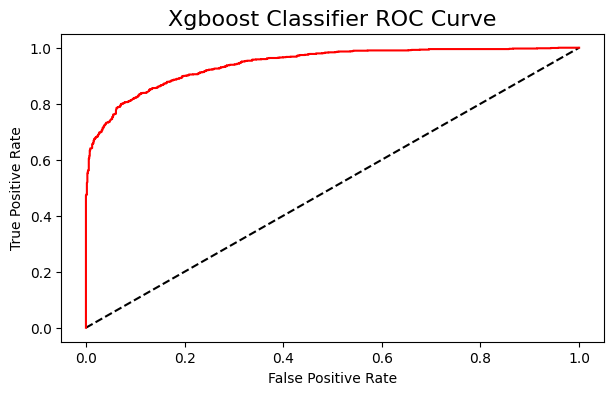

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.86      0.85      0.86      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



['../models/xgboost_model.pkl']

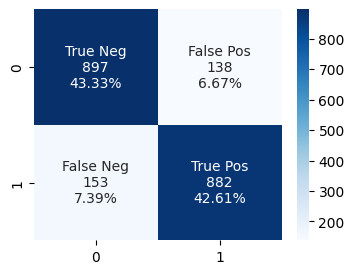

In [47]:
from xgboost import XGBClassifier
import joblib
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Xgboost Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xgboost Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_xgb,x_test,y_test)
joblib.dump(classifier_xgb, "../models/xgboost_model.pkl")


<small>

### Random Forest Classifier :  
#### Excellence en Ensemble : Améliorer la précision prédictive avec la classification Random Forest  

L’algorithme **Random Forest** est une méthode d’apprentissage par ensemble qui combine plusieurs arbres de décision afin d’augmenter la robustesse et la précision des prédictions.  

En agrégeant les résultats de nombreux arbres entraînés sur des sous-échantillons aléatoires des données et des caractéristiques, Random Forest :  
- réduit le risque de surapprentissage (*overfitting*),  
- améliore la capacité de généralisation,  
- et fournit une estimation fiable de l’importance des variables.  

Cette approche est particulièrement efficace pour les problèmes de classification déséquilibrés ou complexes, offrant un compromis optimal entre performance et interprétabilité.  


Accuracy is : 0.8207729468599034
Cross Validation Score :  89.63%
ROC_AUC Score :  82.08%
--------------------------------------------------------------------------------


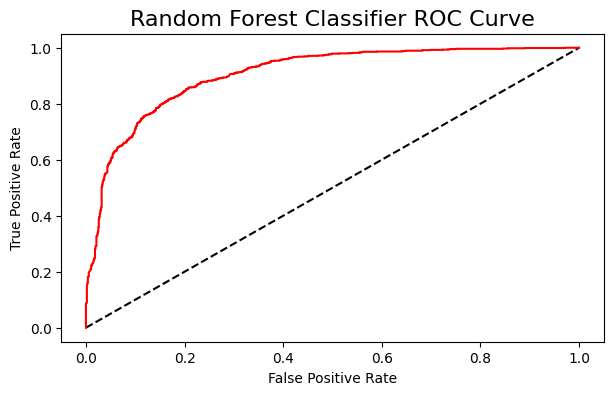

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1035
           1       0.79      0.87      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



['../models/random_forest_model.pkl']

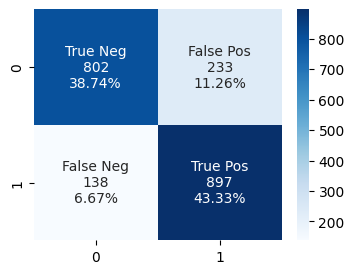

In [48]:
import joblib
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,x_test,y_test)
joblib.dump(classifier_rf, "../models/random_forest_model.pkl")

<small>

### Decision Tree Classifier :  
#### Précision dans la prise de décision : Dévoiler les schémas avec la classification par arbre de décision  

L’algorithme **Decision Tree** repose sur une structure arborescente pour modéliser les décisions et leurs conséquences possibles.  

Grâce à une série de règles hiérarchiques, il :  
- segmente les données en sous-groupes homogènes,  
- met en évidence les relations cachées entre les variables,  
- et facilite l’interprétation grâce à une visualisation claire des règles de décision.  

La classification par arbre de décision constitue une base solide, simple à comprendre et à expliquer, tout en servant souvent de fondement à des méthodes d’ensemble plus puissantes comme Random Forest ou Gradient Boosting.  


Accuracy is : 0.782608695652174
Cross Validation Score :  86.48%
ROC_AUC Score :  78.26%
--------------------------------------------------------------------------------


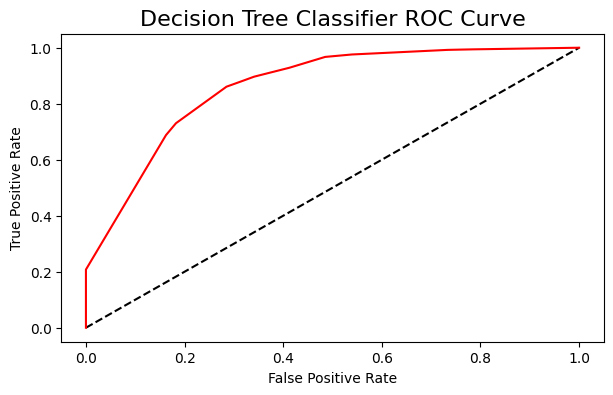

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1035
           1       0.74      0.88      0.80      1035

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



['../models/decision_tree_model.pkl']

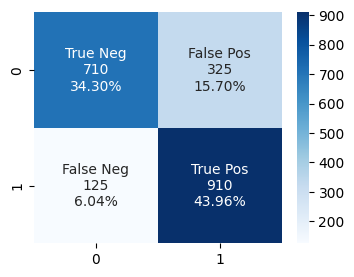

In [49]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,x_test,y_test)
joblib.dump(classifier_dt, "../models/decision_tree_model.pkl")


<small>

### Logistic Regression Classifier  
#### Élégance linéaire : Modéliser les relations prédictives avec la régression logistique  

La **régression logistique** est un modèle linéaire largement utilisé pour la classification binaire.  

Elle permet de :  
- estimer la probabilité d’appartenance à une classe en fonction des variables explicatives,  
- établir des relations claires et interprétables entre les caractéristiques et la variable cible,  
- servir de point de départ robuste pour évaluer la performance de modèles plus complexes.  

Grâce à sa simplicité et à son interprétabilité, la régression logistique reste une référence incontournable dans les projets de classification supervisée.  


Accuracy is : 0.7695652173913043
Cross Validation Score :  84.64%
ROC_AUC Score :  76.96%
--------------------------------------------------------------------------------


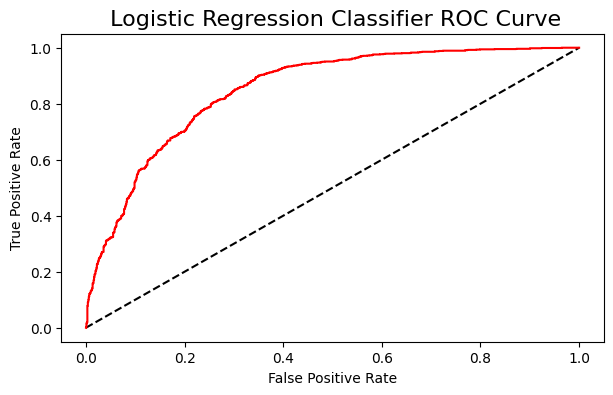

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1035
           1       0.75      0.82      0.78      1035

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



['../models/logistic_regression_model.pkl']

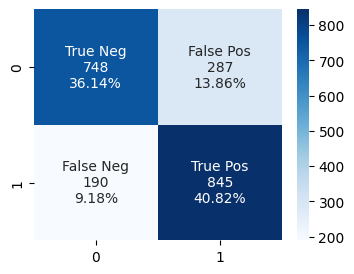

In [50]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

model(classifier_lr,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,x_test,y_test)
joblib.dump(classifier_lr, "../models/logistic_regression_model.pkl")

In [55]:
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoders = {}
for col in categorical_features:   # ex: ['gender', 'Partner', ...]
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

# Sauvegarde
joblib.dump(label_encoders, "../models/label_encoders.pkl")
joblib.dump(ss, "../models/standard_scaler.pkl")


['../models/standard_scaler.pkl']